<a href="https://colab.research.google.com/github/selfhiam/Machine-Learning-Homework/blob/main/%EA%B3%BC%EC%A0%9C_%EC%82%AC%EC%9D%B4%EB%B2%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [124]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

* 랜덤 포레스트 회귀 모델을 사용하여 'Anomaly Scores'를 예측하고, 모델의 성능을 평가하는 RMSE 값을 계산했습니다
* 저의 예측, 프로토콜 : TCP, 포트번호 : 123포트(NTP 시간동기화 포트)를 사용하여 공격을 할 시 위험도가 높지 않다를 예측하고 있습니다.

* 그렇게 생각한 이유 : 123포트(시간동기화 포트)는 UDP밖에 없습니다.

<img src='https://upload3.inven.co.kr/upload/2021/11/01/bbs/i14677401687.png' width=300>

# 1. 데이터 불러오기!

In [125]:
cyber_df = pd.read_csv('/content/drive/MyDrive/KDT v2/머신러닝과 딥러닝/과제/data/cybersecurity_attacks.csv')

In [126]:
cyber_df

,Timestamp,Source IP Address,Destination IP Address,Source Port,Destination Port,Protocol,Packet Length,Packet Type,Traffic Type,Payload Data,...,Action Taken,Severity Level,User Information,Device Information,Network Segment,Geo-location Data,Proxy Information,Firewall Logs,IDS/IPS Alerts,Log Source
0,2023-05-30 06:33:58,103.216.15.12,84.9.164.252,31225,17616,ICMP,503,Data,HTTP,Qui natus odio asperiores nam. Optio nobis ius...,...,Logged,Low,Reyansh Dugal,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,Segment A,"Jamshedpur, Sikkim",150.9.97.135,Log Data,NaN,Server
1,2020-08-26 07:08:30,78.199.217.198,66.191.137.154,17245,48166,ICMP,1174,Data,HTTP,Aperiam quos modi officiis veritatis rem. Omni...,...,Blocked,Low,Sumer Rana,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,Segment B,"Bilaspur, Nagaland",NaN,Log Data,NaN,Firewall
2,2022-11-13 08:23:25,63.79.210.48,198.219.82.17,16811,53600,UDP,306,Control,HTTP,Perferendis sapiente vitae soluta. Hic delectu...,...,Ignored,Low,Himmat Karpe,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,Segment C,"Bokaro, Rajasthan",114.133.48.179,Log Data,Alert Data,Firewall
3,2023-07-02 10:38:46,163.42.196.10,101.228.192.255,20018,32534,UDP,385,Data,HTTP,Totam maxime beatae expedita explicabo porro l...,...,Blocked,Medium,Fateh Kibe,Mozilla/5.0 (Macintosh; PPC Mac OS X 10_11_5; ...,Segment B,"Jaunpur, Rajasthan",NaN,NaN,Alert Data,Firewall
4,2023-07-16 13:11:07,71.166.185.76,189.243.174.238,6131,26646,TCP,1462,Data,DNS,Odit nesciunt dolorem nisi iste iusto. Animi v...,...,Blocked,Low,Dhanush Chad,Mozilla/5.0 (compatible; MSIE 5.0; Windows NT ...,Segment C,"Anantapur, Tripura",149.6.110.119,NaN,Alert Data,Firewall
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,2023-05-26 14:08:42,26.36.109.26,121.100.75.240,31005,6764,UDP,1428,Control,HTTP,Quibusdam ullam consequatur consequuntur accus...,...,Logged,Medium,Adira Madan,Mozilla/5.0 (iPad; CPU iPad OS 14_2_1 like Mac...,Segment A,"Nashik, Manipur",NaN,Log Data,Alert Data,Firewall
39996,2023-03-27 00:38:27,17.21.163.81,196.108.134.78,2553,28091,UDP,1184,Control,HTTP,Quaerat neque esse. Animi expedita natus commo...,...,Logged,High,Rati Dara,Mozilla/5.0 (Windows; U; Windows 98; Win 9x 4....,Segment C,"Vadodara, Mizoram",60.51.30.46,Log Data,NaN,Firewall
39997,2022-03-31 01:45:49,162.35.217.57,98.107.0.15,22505,25152,UDP,1043,Data,DNS,Enim at aspernatur illum. Saepe numquam eligen...,...,Blocked,Low,Samiha Joshi,Mozilla/5.0 (Windows; U; Windows NT 4.0) Apple...,Segment C,"Mahbubnagar, Himachal Pradesh",NaN,Log Data,Alert Data,Server
39998,2023-09-22 18:32:38,208.72.233.205,173.79.112.252,20013,2703,UDP,483,Data,FTP,Officiis dolorem sed harum provident earum dis...,...,Ignored,Low,Rasha Chauhan,Mozilla/5.0 (X11; Linux i686) AppleWebKit/536....,Segment B,"Rourkela, Arunachal Pradesh",137.76.130.8,Log Data,NaN,Server


In [127]:
# cyber_df의 정보 확인
cyber_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Timestamp               40000 non-null  object 
 1   Source IP Address       40000 non-null  object 
 2   Destination IP Address  40000 non-null  object 
 3   Source Port             40000 non-null  int64  
 4   Destination Port        40000 non-null  int64  
 5   Protocol                40000 non-null  object 
 6   Packet Length           40000 non-null  int64  
 7   Packet Type             40000 non-null  object 
 8   Traffic Type            40000 non-null  object 
 9   Payload Data            40000 non-null  object 
 10  Malware Indicators      20000 non-null  object 
 11  Anomaly Scores          40000 non-null  float64
 12  Alerts/Warnings         19933 non-null  object 
 13  Attack Type             40000 non-null  object 
 14  Attack Signature        40000 non-null

| 영어                     | 한글                   |
|--------------------------|-----------------------|
| Timestamp                | 발생일시               |
| Source IP Address        | 출발지 IP 주소         |
| Destination IP Address   | 목적지 IP 주소         |
| Source Port              | 출발지 포트            |
| Destination Port         | 목적지 포트            |
| Protocol                 | 프로토콜               |
| Packet Length            | 패킷 길이              |
| Packet Type              | 패킷 유형              |
| Traffic Type             | 트래픽 유형            |
| Payload Data             | 페이로드 데이터         |
| Malware Indicators       | 악성코드 지표           |
| Anomaly Scores           | 이상 징후 점수         |
| Alerts/Warnings          | 경보/경고               |
| Attack Type              | 공격 유형               |
| Attack Signature         | 공격 서명               |
| Action Taken             | 조치 사항               |
| Severity Level           | 심각도 수준             |
| User Information         | 사용자 정보             |
| Device Information       | 장치 정보               |
| Network Segment          | 네트워크 세그먼트       |
| Geo-location Data        | 지리적 위치 데이터      |
| Proxy Information        | 프록시 정보             |
| Firewall Logs            | 방화벽 로그             |
| IDS/IPS Alerts           | IDS/IPS 경보            |
| Log Source               | 로그 출처               |

## 1-1. 기술 요약

### 네트워크 프로토콜
- **ICMP (Internet Control Message Protocol)**: 네트워크 장치 간의 오류 메시지 및 운영 정보를 전달하는데 사용되는 프로토콜입니다.
-- ex) Ping
- **TCP (Transmission Control Protocol)**: 인터넷 상에서 데이터를 안정적으로, 순서대로, 에러 없이 전송하기 위한 표준입니다.
-- ex) http:80 port, https:443 port
- **UDP (User Datagram Protocol)**: TCP보다 빠르지만 신뢰성이 낮은 데이터 전송 방식입니다.
- **DNS (Domain Name System)**: 도메인 이름을 IP 주소로 변환하여 인터넷 상에서 컴퓨터를 찾을 수 있게 해주는 시스템입니다.
-- ex) www.bobjangsu.com
- **FTP (File Transfer Protocol)**: 파일을 전송하기 위한 표준 네트워크 프로토콜입니다.
-- ex) ftp-simple
- **HTTP (Hypertext Transfer Protocol)**: 웹상에서 데이터를 주고받기 위한 프로토콜입니다.
-- ex) http://localhost:8080

### 네트워크 세그먼트 (Segment [A, B, C])
- **네트워크 세그먼트**: 네트워크를 작은 그룹으로 나눈 부분입니다. 각 세그먼트는 특정 영역 또는 목적을 위해 사용됩니다.

### 공격 유형 및 대응 조치
- **DDoS (Distributed Denial of Service)**: 다수의 시스템이 한 대상을 집중 공격하여 서비스를 마비시키는 공격입니다.
- **Malware**: 악성 소프트웨어(해킹툴)로 시스템에 피해를 주거나 정보를 도난하는 소프트웨어입니다.
- **Intrusion**: 무단 침입을 의미하며, 시스템이나 네트워크에 권한 없이 접근하는 것을 말합니다.
- **Blocked**: 네트워크 보안 시스템이 위험 요소를 차단한 상태입니다.
- **Ignored**: 네트워크 보안 시스템이 특정 활동을 무시하거나 미처리한 상태입니다.
- **Logged**: 네트워크 활동이 기록된 상태로, 추후 분석을 위해 사용됩니다.


In [128]:
# 데이터 프레임의 결측치를 확인하여 합산 한 값을 출력합니다.
cyber_df.isna().sum()

Timestamp                     0
Source IP Address             0
Destination IP Address        0
Source Port                   0
Destination Port              0
Protocol                      0
Packet Length                 0
Packet Type                   0
Traffic Type                  0
Payload Data                  0
Malware Indicators        20000
Anomaly Scores                0
Alerts/Warnings           20067
Attack Type                   0
Attack Signature              0
Action Taken                  0
Severity Level                0
User Information              0
Device Information            0
Network Segment               0
Geo-location Data             0
Proxy Information         19851
Firewall Logs             19961
IDS/IPS Alerts            20050
Log Source                    0
dtype: int64

In [129]:
# 데이터 프레임의 각 열에 대한 통계 요약보기
# 뒤에 .T를 붙이면 행과 열을 변경하여 표출합니다.
cyber_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Source Port,40000.0,32970.356450,18560.425604,1027.0,16850.75,32856.000,48928.25,65530.0
Destination Port,40000.0,33150.868650,18574.668842,1024.0,17094.75,33004.500,49287.00,65535.0
Packet Length,40000.0,781.452725,416.044192,64.0,420.00,782.000,1143.00,1500.0
Anomaly Scores,40000.0,50.113473,28.853598,0.0,25.15,50.345,75.03,100.0


In [130]:
# 오브젝트 타입의 열만 출력
cyber_df.describe(include = 'object').T
# count = 열에 있는 유효한 값의 개수
# unique = 열에 고유한 값의 개수
# top = 열에서 가장 자주 등장하는 값
# freq = 가장 자주 등장하는 값의 빈도

,count,unique,top,freq
Timestamp,40000,39997,2022-06-11 14:28:15,2
Source IP Address,40000,40000,103.216.15.12,1
Destination IP Address,40000,40000,84.9.164.252,1
Protocol,40000,3,ICMP,13429
Packet Type,40000,2,Control,20237
Traffic Type,40000,3,DNS,13376
Payload Data,40000,40000,Qui natus odio asperiores nam. Optio nobis ius...,1
Malware Indicators,20000,1,IoC Detected,20000
Alerts/Warnings,19933,1,Alert Triggered,19933
Attack Type,40000,3,DDoS,13428


<ipython-input-131-e3f83599bdde>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(cyber_df.corr(), cmap='coolwarm', vmax=1, vmin=-1, annot=True)


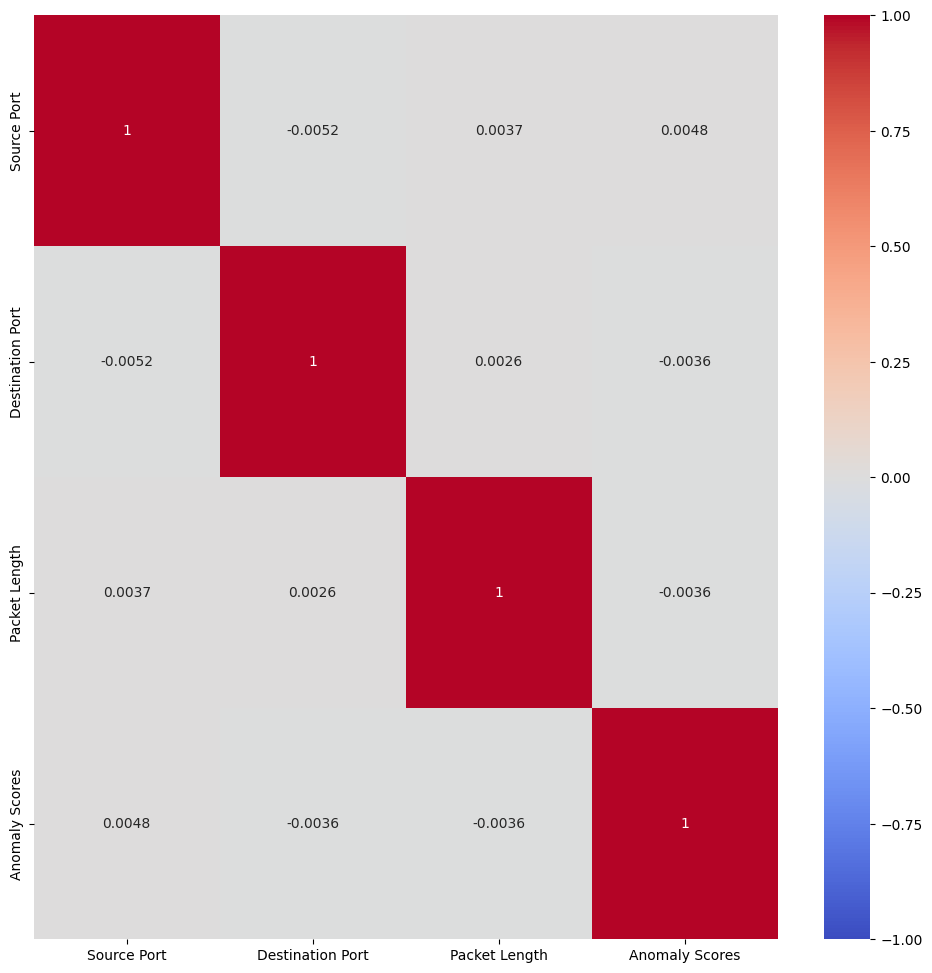

In [131]:
plt.figure(figsize=(12, 12))
sns.heatmap(cyber_df.corr(), cmap='coolwarm', vmax=1, vmin=-1, annot=True)
plt.show()

* 분석한 히트맵에 따르면, 대부분의 데이터가 0에 가까운 상관 계수를 보이고 있으며, 일부는 음수 값을 가지고 있습니다.

* 그 결과 데이터 내 변수들 간에 강한 선형 관계가 존재하지 않음을 나타냅니다.

* +1에 가까운 값은 강력한 양의 선형 관계, -1에 가까운 값은 강한 음의 선형 관계를 의미합니다.

* 그러나 상관 계수가 낮다는 것은 비선형 관계의 가능성을 배제하지 않으며, 특히나 사이버 보안 데이터와 같은 복잡한 데이터 세트의 경우, 변수들 간의 관계가 선형적이지 않을 수 있습니다.

# 2. 데이터 마이닝

In [132]:
# Packet Type의 그룹별로 Packet Length의 평균값을 구해서 cyber_df에 Packet Length Average의 컬럼을 추가합니다.
cyber_df['Packet Length Average'] = cyber_df.groupby('Packet Type')['Packet Length'].transform('mean')

* Packet Length Average를 추가함으로써 데이터 요약 및 단순화를 진행하였고, 보안 위협을 분석하거나 예측함에 유용한 정보를 제공하도록 추가하였습니다.

In [133]:
# 불필요한 컬럼을 삭제
cyber_df.drop({'Timestamp',
               'Source IP Address',
               'Destination IP Address',
               'Source Port',
               'Packet Length',
               'Packet Type',
               'Payload Data',
               'Malware Indicators',
               'Alerts/Warnings',
               'Attack Signature',
               'User Information',
               'Device Information',
               'Geo-location Data',
               'Proxy Information',
               'Firewall Logs',
               'IDS/IPS Alerts',
               'Log Source'}, axis=1, inplace=True)

<ipython-input-134-e3f83599bdde>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(cyber_df.corr(), cmap='coolwarm', vmax=1, vmin=-1, annot=True)


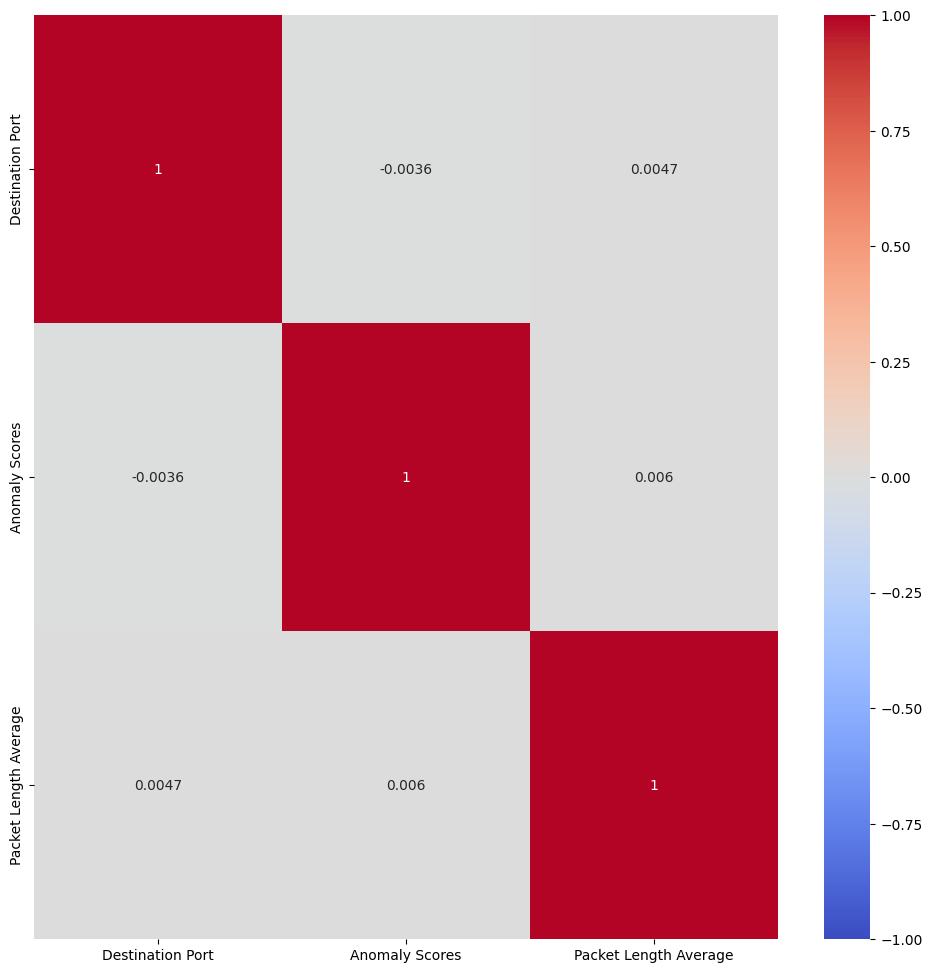

In [134]:
plt.figure(figsize=(12, 12))
sns.heatmap(cyber_df.corr(), cmap='coolwarm', vmax=1, vmin=-1, annot=True)
plt.show()

* 불필요 컬럼 삭제 및 Packet Length Average의 컬럼을 추가 후 heatmap을 다시 찍은 결과 다른컬럼보다 비교적 높은 수치의 상관계수를 가졌습니다.

* 해당 결과는 다른 변수들보다 더 유의미하게 관계를 가지고 있을 가능성을 나타냅니다.

* 해당 컬럼을 추가함에 있어서 Anomaly Scores의 좀 더 정확한 값을 가질 수 있도록 도움이 됩니다.

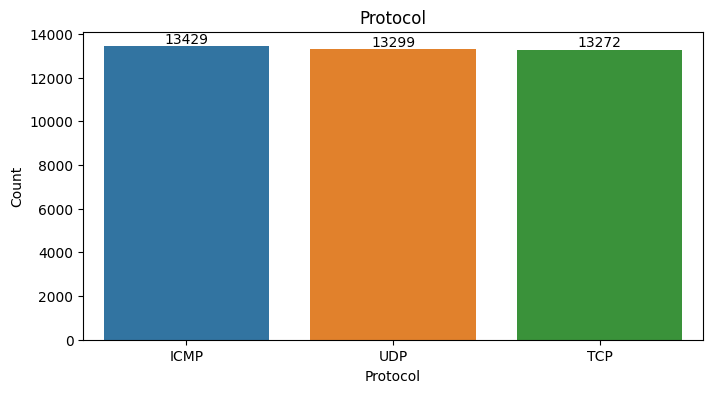

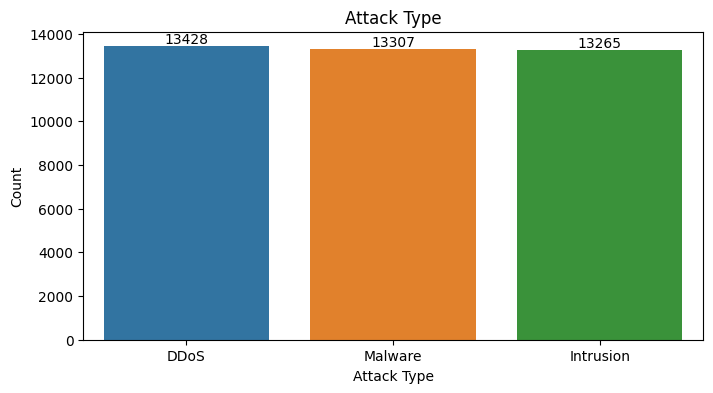

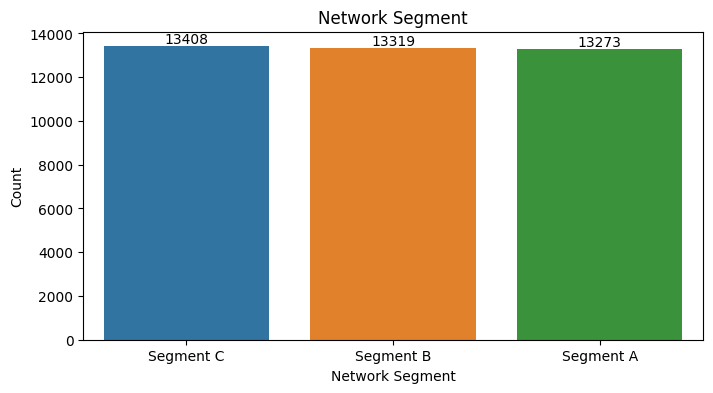

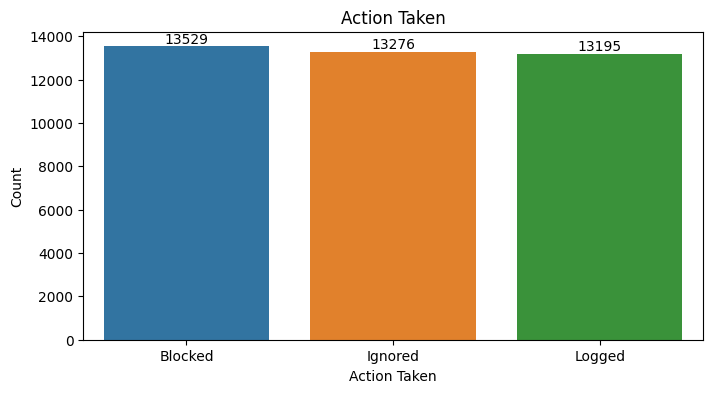

In [135]:
columns = ['Protocol', 'Attack Type', 'Network Segment', 'Action Taken']

for column in columns:

    counts = cyber_df[column].value_counts()

    plt.figure(figsize=(8, 4))
    sns.barplot(x=counts.index, y=counts.values)

    for index, value in enumerate(counts.values):
        plt.text(index, value, f'{value}', ha='center', va='bottom')

    plt.title(column)
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.show()

## 2-1. 원 핫 인코딩 함수

In [136]:
# 원 핫 인코딩 방식의 함수 설정

# ICMP = 0, TCP = 1, UDP = 0
def convert_protocol(data):
    if data == 'ICMP':
        return 0
    elif data == 'TCP':
        return 1
    else :
        return 2

cyber_df['Protocol'] = cyber_df['Protocol'].apply(convert_protocol)

# Malware = 0, DDoS = 1, Intrusion = 2
def convert_attacktype(data):
    if data == 'Malware':
        return 0
    elif data == 'DDoS':
        return 1
    else :
        return 2

cyber_df['Attack Type'] = cyber_df['Attack Type'].apply(convert_attacktype)

# Segment A = 0, Segment B = 1, Segment C = 2
def convert_network(data):
    if data == 'Segment A':
        return 0
    elif data == 'Segment B':
        return 1
    else :
        return 2

cyber_df['Network Segment'] = cyber_df['Network Segment'].apply(convert_network)

# Blocked = 0, Ignored = 1, Logged = 2
def convert_taken(data):
    if data == 'Blocked':
        return 0
    elif data == 'Ignored' :
        return 1
    else :
        return 2

cyber_df['Action Taken'] = cyber_df['Action Taken'].apply(convert_taken)

# 원-핫-인코딩
def encode_features(df, columns_to_encode):
    return pd.get_dummies(df, columns=columns_to_encode)

cyber_df = encode_features(cyber_df, ['Traffic Type', 'Severity Level'])

* 원-핫-인코딩 후 변수의 분포도 확인

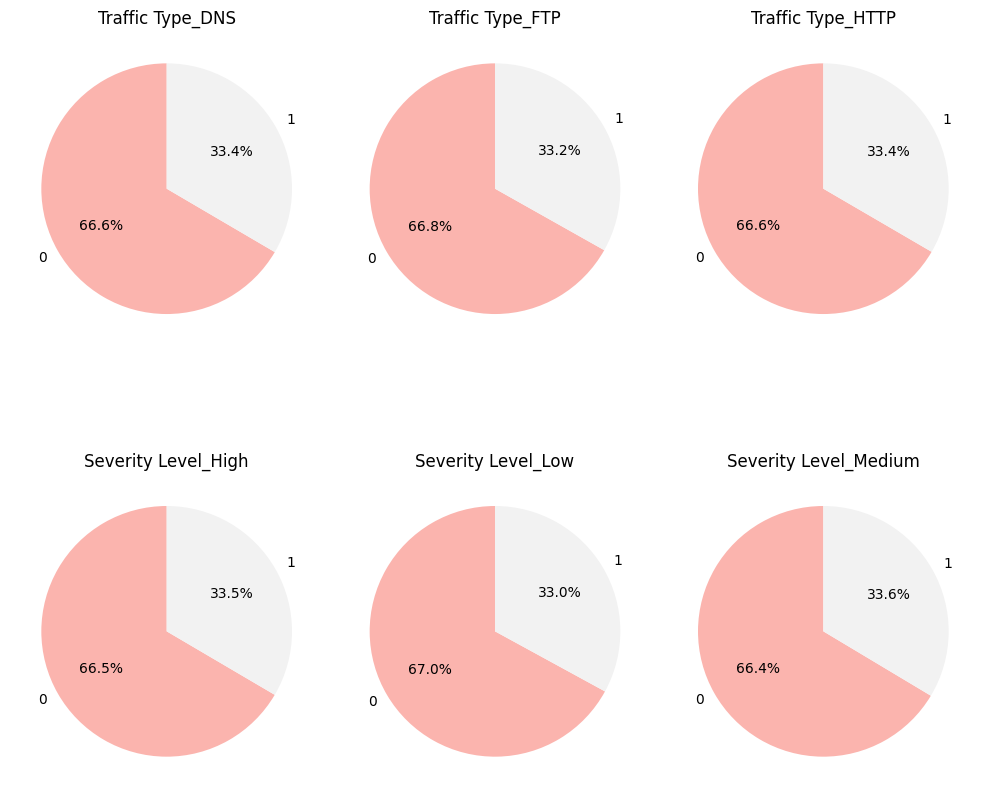

In [137]:
vars = ['Traffic Type_DNS', 'Traffic Type_FTP', 'Traffic Type_HTTP', 'Severity Level_High', 'Severity Level_Low', 'Severity Level_Medium']

# subplot의 행, 열, 사이즈 설정
fig, axes = plt.subplots(2, 3, figsize=(10, 10))

for i, var in enumerate(vars):

    # 행과 열 인덱스 계산
    row = i // 3
    col = i % 3

    counts = cyber_df[var].value_counts()

    counts.plot.pie(autopct='%1.1f%%', startangle=90, cmap='Pastel1', ax=axes[row, col])
    axes[row, col].set_title(var)
    axes[row, col].set_ylabel('')

# 차트간 충돌 방지
plt.tight_layout()
plt.show()

# 3. 데이터 예측 및 결과값

In [138]:
# X에 독립변수(예측 결과에 영향을 미치는 변수, Anomaly Scores를 제외한 모든 변수)
X = cyber_df.drop('Anomaly Scores', axis=1)

# y에 종속변수(예측하려는 결과)
y = cyber_df['Anomaly Scores']

# 학습 데이터와 테스트 데이터 분리!
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=24)

# 랜덤 포레스트를 사용하여, 결정 트리의 개수를 200을 설정!
rf = RandomForestRegressor(n_estimators=200, random_state=24)

# 학습시작!
rf.fit(X, y)

# 임의의 데이터를 생성!
# Protocol = ICMP, TCP, UDP
# Attack Type = DDoS, Malware, Intrusion
# Network Segment = Segment A, Segment B, Segment C
# Action Taken = Blocked, Ignored, Logged
# Traffic Type = HTTP, DNS, FTP
# Severity Level = Low, Medium, High

new_data = pd.DataFrame({
    'Destination Port': [17616, 17619, 123],
    'Protocol': [convert_protocol('ICMP'), convert_protocol('ICMP'), convert_protocol('TCP')],
    'Attack Type': [convert_attacktype('Malware'), convert_attacktype('DDoS'), convert_attacktype('Intrusion')],
    'Network Segment': [convert_network('Segment A'), convert_network('Segment B'), convert_network('Segment C')],
    'Action Taken': [convert_taken('Logged'), convert_taken('Blocked'), convert_taken('Ignored')],
    'Traffic Type': ['HTTP', 'DNS', 'FTP'],
    'Severity Level': ['Low', 'High', 'Medium']
})

# Traffic Type, Severity Level의 원 핫 인코딩 함수 실행
encoded_new_data = encode_features(new_data, ['Traffic Type', 'Severity Level'])

# 원핫인코딩된 데이터 프레임의 컬럼을 X의 컬럼 순서와 동일하게 재정렬(reindex)하며, 새롭게 생성된 데이터 컬럼에는 fill_value=0을 사용하여 X에 값이 없을때 0을 넣습니다.
final_new_data = encoded_new_data.reindex(columns = X.columns, fill_value=0)

# Anomaly Scores 예측 수행
pred_score = rf.predict(final_new_data)

# RMSE값을 위한 예측
y_pred = rf.predict(X_test)

# 실제 값, 예측 값 사이의 평균 제곱 오차(MSE) 계산
mse = mean_squared_error(y_test, y_pred)

# MSE값을 RMSE값으로 변경
rmse = np.sqrt(mse)

# 값을 소수점 2째 자리까지 출력
print("RMSE값: ", round(rmse, 2))
print("예측된 Anomaly Scores:", [round(score, 2) for score in pred_score])

# Network 추가 안했을 때, 예측된 Anomaly Scores: 38.18
# Network 추가 했을때, 예측된 Anomaly Scores: 32.64
# Taken 추가했을때, 예측된 Anomaly Scores: 30.52

RMSE값:  11.25
예측된 Anomaly Scores: [30.85, 44.37, 33.76]


# 4. 결론

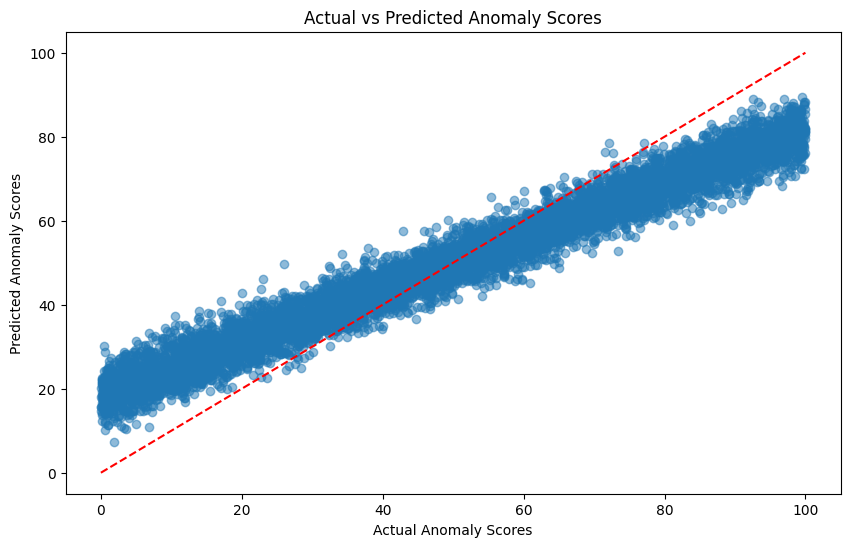

In [142]:
# 실제 값 대비 예측 값의 산점도
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual Anomaly Scores')
plt.ylabel('Predicted Anomaly Scores')
plt.title('Actual vs Predicted Anomaly Scores')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()

* 해당 산점도를 확인 결과.

* 코드의 실제값(y_test) 와 예측값(y_pred)이 기준인 대각선에 가깝게 분포가 되어있으며, 모델의 정확성이 높다고 판단이 됩니다.

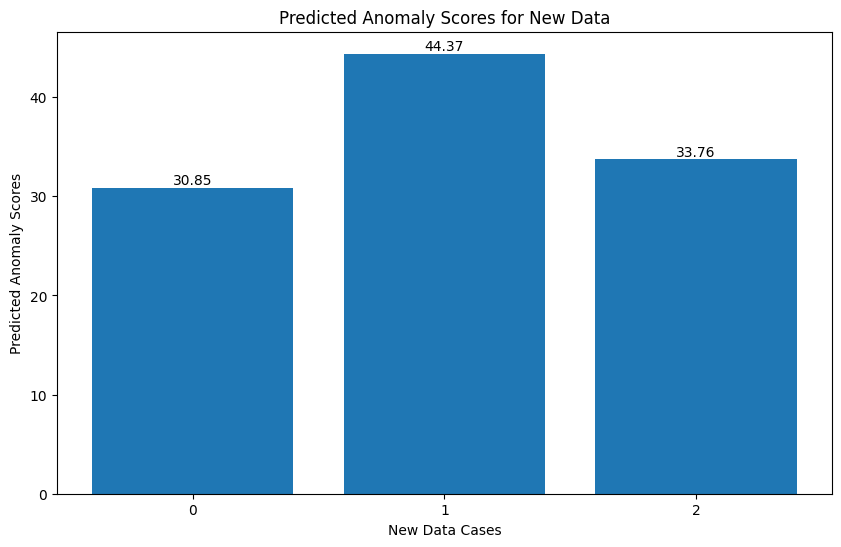

In [145]:
# 새로운 데이터에 대한 예측 결과의 막대 그래프
plt.figure(figsize=(10, 6))

bars = plt.bar(new_data.index, pred_score)

plt.xlabel('New Data Cases')
plt.ylabel('Predicted Anomaly Scores')
plt.title('Predicted Anomaly Scores for New Data')
plt.xticks(new_data.index, labels=new_data.index)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom', ha='center')

plt.show()

# 결론

```
    'Destination Port': [123],
    'Protocol': [convert_protocol('TCP')],
    'Attack Type': [convert_attacktype('Intrusion')],
    'Network Segment': [convert_network('Segment C')],
    'Action Taken': [convert_taken('Ignored')],
    'Traffic Type': ['FTP'],
    'Severity Level': ['Medium']
```

포트 123 : 일반적으로 NTP (Network Time Protocol) 서비스에 사용되며, 중간 수준의 위험을 나타냅니다.

TCP : 신뢰성 있는 데이터 전송을 위한 프로토콜로, 일반적인 데이터 전송에 사용 되었습니다.

Intrusion : 시스템이나 네트워크에 무단으로 접근하는 시도를 나타냅니다. 하지만 여기서는 중간 정도의 심각성을 나타냅니다.

Action Taken - Ignored : 보안시스템에 의해 차단 혹은 무시 되었습니다.

FTP : 파일 전송에 사용되는 네트워크 프로토콜입니다.

Severity Level - Medium : 활동시 위험 평가는 중간 정도입니다.



* 데이터 비교(인덱스1)
* 1. 17619 포트와 DDos 공격을 당했습니다.
##### 17619포트는 일반적으로 널리 사용되지 않으며, 다른 특정 서비스에 사용이 되는것으로 유추됩니다.
* 2. DDoS 공격
##### 일반적으로 높은 위험 수준을 가지고 있습니다.

## 최종결론
* 데이터 인덱스2에서 활동은 데이터 인덱스1에서 언급된 DDoS 공격과 비교하였을때, 생각보다 낮은 위험 수준을 나타냅니다.

* 마지막으로 저의 예측한 내용과 유사한 결과가 나왔습니다.

<img src='https://upload3.inven.co.kr/upload/2022/03/04/bbs/i13821281165.png?MW=360' width=300>

### 왜 RandomForestRegressor를 사용을 하였는가

* 정말 많은 모델을 사용해보면서 가장 좋은 성능의 값을 찾으려 노력 및 테스트를 진행 하였습니다.

```
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

from sklearn.metrics import mean_squared_error

models = [
    ("Linear Regression", LinearRegression()),
    ("Decision Tree", DecisionTreeRegressor()),
    ("Random Forest", RandomForestRegressor()),
    ("Support Vector Machines", SVR()),
]

for name, model in models:
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    rmse = mean_squared_error(y_test, predictions, squared=False)
    print(f"{name} RMSE: {rmse}")
```


```
Linear Regression RMSE: 28.984647648199182
Decision Tree RMSE: 41.144332776291925
Random Forest RMSE: 31.097028451040362
Support Vector Machines RMSE: 29.00178953252084
```




### autoML 설치 실패로 인하여 h2o 사용

```
!pip install h2o

import h2o
from h2o.automl import H2OAutoML

h2o.init()

hf = h2o.H2OFrame(cyber_df)

x = hf.columns
y = "Anomaly Scores"
x.remove(y)

aml = H2OAutoML(max_models=20, seed=1)
aml.train(x=x, y=y, training_frame=hf)
```

```
Model Summary for Stacked Ensemble:
key	value
Stacking strategy	cross_validation
Number of base models (used / total)	3/20
# GBM base models (used / total)	0/7
# XGBoost base models (used / total)	2/6
# GLM base models (used / total)	0/1
# DeepLearning base models (used / total)	0/4
# DRF base models (used / total)	1/2
Metalearner algorithm	GLM
Metalearner fold assignment scheme	Random
Metalearner nfolds	5
Metalearner fold_column	None
Custom metalearner hyperparameters	None

MSE: 805.6428394106979
RMSE: 28.383848213565013
MAE: 24.59646703653416
RMSLE: 0.905349995895383
Mean Residual Deviance: 805.6428394106979
R^2: 0.030354380130691694
Null degrees of freedom: 10023
Residual degrees of freedom: 10020
Null deviance: 8331866.297579063
Residual deviance: 8075763.822252836
AIC: 95533.8842562427
ModelMetricsRegressionGLM: stackedensemble
** Reported on cross-validation data. **

MSE: 832.2703233999483
RMSE: 28.849095711996732
MAE: 24.973553203341602
RMSLE: 0.9298791227187008
Mean Residual Deviance: 832.2703233999483
R^2: 0.00028707848732445473
Null degrees of freedom: 39999
Residual degrees of freedom: 39997
Null deviance: 33300989.551038466
Residual deviance: 33290812.935997933
AIC: 382489.37449568126
Cross-Validation Metrics Summary:
mean	sd	cv_1_valid	cv_2_valid	cv_3_valid	cv_4_valid	cv_5_valid
mae	24.977064	0.1672709	25.050108	25.075254	24.690954	25.099634	24.969368
mean_residual_deviance	832.4099	9.345951	835.3343	839.06177	818.4034	841.3553	827.89484
mse	832.4099	9.345951	835.3343	839.06177	818.4034	841.3553	827.89484
null_deviance	6660198.0	50761.305	6706905.0	6658158.5	6632459.0	6711768.5	6591698.5
r2	0.0001408	0.0002384	0.0005216	0.0000270	0.0002262	-0.0000422	-0.0000283
residual_deviance	6658914.5	49995.35	6702722.5	6657955.0	6630704.0	6711491.0	6591698.5
rmse	28.85115	0.1622219	28.902151	28.966562	28.60775	29.006124	28.77316
rmsle	0.9299224	0.0088613	0.9225461	0.9310967	0.9255101	0.944782	0.9256771

[tips]
Use `model.explain()` to inspect the model.
--
Use `h2o.display.toggle_user_tips()` to switch on/off this section.
```

```
lb = aml.leaderboard
print(lb.head(rows=lb.nrows))

model_id                                                   rmse      mse      mae     rmsle    mean_residual_deviance
StackedEnsemble_AllModels_1_AutoML_1_20240104_00022     28.8491  832.27   24.9736  0.929879                   832.27
StackedEnsemble_BestOfFamily_1_AutoML_1_20240104_00022  28.8513  832.398  24.9748  0.929911                   832.398
GLM_1_AutoML_1_20240104_00022                           28.8537  832.538  24.9802  0.929992                   832.538
DeepLearning_grid_2_AutoML_1_20240104_00022_model_1     28.8629  833.066  24.9818  0.92844                    833.066
GBM_grid_1_AutoML_1_20240104_00022_model_2              28.8643  833.149  24.9842  0.930031                   833.149
GBM_grid_1_AutoML_1_20240104_00022_model_1              28.8675  833.333  24.9849  0.929974                   833.333
DeepLearning_grid_1_AutoML_1_20240104_00022_model_1     28.8706  833.509  24.9891  0.92885                    833.509
XRT_1_AutoML_1_20240104_00022                           28.8722  833.603  24.9781  0.929794                   833.603
DeepLearning_grid_3_AutoML_1_20240104_00022_model_1     28.8741  833.711  24.9941  0.933227                   833.711
GBM_3_AutoML_1_20240104_00022                           28.8813  834.127  24.983   0.929963                   834.127
GBM_5_AutoML_1_20240104_00022                           28.8822  834.18   24.9896  0.93012                    834.18
GBM_2_AutoML_1_20240104_00022                           28.8858  834.39   24.9919  0.930124                   834.39
DeepLearning_1_AutoML_1_20240104_00022                  28.8927  834.787  24.9991  0.927958                   834.787
GBM_1_AutoML_1_20240104_00022                           28.9261  836.722  25.0132  0.93031                    836.722
GBM_4_AutoML_1_20240104_00022                           28.9349  837.23   25.0163  0.930567                   837.23
XGBoost_3_AutoML_1_20240104_00022                       28.9918  840.524  25.0487  0.931727                   840.524
XGBoost_grid_1_AutoML_1_20240104_00022_model_3          29.0642  844.73   25.0947  0.932052                   844.73
XGBoost_grid_1_AutoML_1_20240104_00022_model_1          29.3895  863.742  25.2722  0.935219                   863.742
XGBoost_2_AutoML_1_20240104_00022                       29.4774  868.916  25.3016  0.935324                   868.916
XGBoost_grid_1_AutoML_1_20240104_00022_model_2          29.5434  872.815  25.3408  0.935154                   872.815
XGBoost_1_AutoML_1_20240104_00022                       30.4359  926.345  25.8378  0.945463                   926.345
DRF_1_AutoML_1_20240104_00022                           31.4636  989.957  26.455   0.956544                   989.957
```

* 이렇게 수많은 데이터 모델의 선택 및 최적의 파라미터 찾기를 하였습니다.
* 다만... 솔직히 rmse값이 맘에 안들었습니다.
* 마지막으로 도전하는 심정으로 k-fold(교차검증)을 추가하여 테스트를 진행하였습니다



```
# from sklearn.model_selection import cross_val_score
# from sklearn.metrics import mean_squared_error
# from sklearn.model_selection import KFold
# from sklearn.ensemble import RandomForestRegressor
# import numpy as np

# # 모델 정의
# model = RandomForestRegressor()

# # K-Fold 교차 검증 정의
# kfold = KFold(n_splits=5, shuffle=True, random_state=24)

# # 교차 검증 수행
# cv_scores = cross_val_score(model, X, y, cv=kfold, scoring='neg_mean_squared_error')

# # 교차 검증 점수는 음의 MSE이므로, 부호를 반전시켜주고 RMSE로 변환
# rmse_scores = np.sqrt(-cv_scores)

# print("교차 검증 점수: ", rmse_scores)
# print("평균 교차 검증 점수: ", rmse_scores.mean())

# # 모델 학습
# model.fit(X, y)

# # 예측 수행
# y_pred = model.predict(X)

# # 성능 지표 계산
# mse = mean_squared_error(y, y_pred)
# rmse = np.sqrt(mse)

# print("MSE: ", mse)
# print("RMSE: ", rmse)

# 교차 검증 점수:  [31.12703269 31.3330684  31.06812884 31.03117779 31.22088958]
# 평균 교차 검증 점수:  31.1560594620094
# MSE:  137.23798576035202
# RMSE:  11.714861747385328
```

* RMSE값을 딱 보는 순간 느꼈습니다. 아 K-fold 그는 신이다...
* 이렇게 최대한 낮은 값의 RMSE를 찾은 후 최적의 파라미터를 찾으려고 하였습니다.



```
# param_distribs = {
#         'n_estimators': [10, 50, 100, 150, 200],
#         'max_features': ['auto', 'sqrt', 'log2'],
#     }

# # RandomizedSearchCV를 설정합니다.
# rnd_search = RandomizedSearchCV(model, param_distributions=param_distribs,
#                                 n_iter=10, cv=kfold, scoring='neg_mean_squared_error', n_jobs=-1, random_state=42)

# # RandomizedSearchCV를 수행합니다.
# rnd_search.fit(X, y)

# # 최적의 하이퍼파라미터를 출력합니다.
# print("최적의 하이퍼파라미터: ", rnd_search.best_params_)

# # 최적의 모델을 가져옵니다.
# best_model = rnd_search.best_estimator_
```

나온결과 : 최적의 하이퍼파라미터:  {'n_estimators': 200, 'max_features': 'auto'}
* 여기서 max_features : auto를 입력하면 지속적으로 warn 문장이 나와 제거하였습니다.
